# **Should a Bank Open an ATM in Area X?**

## **Business Context**

A bank is planning to open a new ATM in Area X.

Opening and maintaining an ATM costs:
  1. Installation cost: ₹8,00,000
  2. Monthly maintenance cost: ₹50,000

The bank earns approximately:
   * ₹15 per transaction (interchange + service revenue)


The bank estimates that at least 4,000 transactions per month are required for the ATM to be profitable.

Before investing, the bank collects sample data to statistically test whether demand is sufficient.


> *A bank wanted to decide whether to open an ATM in a new area. Since profitability required at least 4,000 transactions per month, we formulated a one-tailed hypothesis test where the null assumed insufficient demand. Using sample transaction data, we computed a t-statistic and found statistically significant evidence that average demand exceeded the threshold. Hence, the decision was data-driven.*


### Step 1: Formulating the Problem

> Is the average number of ATM transactions per month in Area X at least 4,000?

#### Importing Libraries

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Step 2: Sample Data Collection ((Simulated Real-World Data))

> The bank surveys similar areas nearby and estimates expected usage.
They collect data for 30 days using a temporary ATM van.

From sample data:
* Sample size (n) = 30 days
* Sample mean (x̄) = 4,300 transactions
* Sample standard deviation (s) = 600 transactions
* Significance level (α) = 0.05
* Since population standard deviation is unknown → use t-test.

In [2]:
np.random.seed(42)

# Simulating 30 days of ATM transactions
# Mean around 4300, std around 600
transactions = np.random.normal(loc=4300, scale=600, size=30)

# Round to realistic transaction numbers
transactions = np.round(transactions)

transactions

array([4598., 4217., 4689., 5214., 4160., 4160., 5248., 4760., 4018.,
       4626., 4022., 4021., 4445., 3152., 3265., 3963., 3692., 4489.,
       3755., 3453., 5179., 4165., 4341., 3445., 3973., 4367., 3609.,
       4525., 3940., 4125.])

### Step 3: Define Hypotheses


> Let μ = Average monthly ATM transactions in Area X. We perform a one-tailed hypothesis test.

* **Null Hypothesis (H₀):**
𝜇 ≤ 4000

(The area does NOT generate enough transactions)

* **Alternative Hypothesis (H₁):**
𝜇 > 4000

(The area generates enough transactions → ATM is viable)



In [3]:
mu_0 = 4000  # Minimum required transactions

### Step 4: Perform One-Sample t-Test
* stats.ttest_1samp() returns:

**t_stat** → calculated t value

**p_value_two_tailed** → probability of observing this result under H₀ (two-tailed)


> Internally, it already computed sample mean, sample standard deviation, degrees of freedom, t-statistic

* But our hypothesis was: (H1) μ > 4000. That is a right-tailed test.
So, p(one−tailed)​= p(two−tailed​​) / 2

In [4]:
t_stat, p_value_two_tailed = stats.ttest_1samp(transactions, mu_0)

# Convert to one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2

t_stat, p_value_one_tailed

(np.float64(1.8985934103921083), np.float64(0.03380473747573901))

### Step 5: Decision Rule


> If : p < α, Reject H₀

In [5]:
alpha = 0.05

if (t_stat > 0) and (p_value_one_tailed < alpha):
    print("Reject Null Hypothesis")
    print("Conclusion: Area has sufficient demand. Open the ATM.")
else:
    print("Fail to Reject Null Hypothesis")
    print("Conclusion: Demand may not be sufficient.")

Reject Null Hypothesis
Conclusion: Area has sufficient demand. Open the ATM.


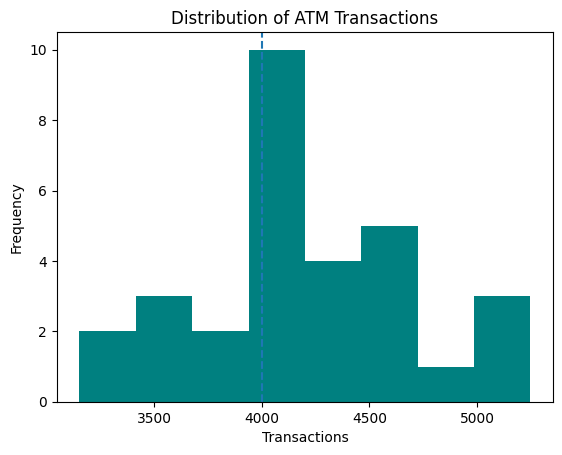

In [11]:
plt.hist(transactions, color = 'teal', bins=8)
plt.axvline(mu_0, linestyle='dashed')
plt.title("Distribution of ATM Transactions")
plt.xlabel("Transactions")
plt.ylabel("Frequency")
plt.show()

### Step 6: Conclusion


> There is statistically significant evidence at the 5% level to conclude that- The average monthly transactions in Area X exceed 4,000. Therefore, the bank should open the ATM, as expected usage is sufficient for profitability.

Statistically:

The ATM is expected to generate:

4300
×
15 =
₹
64
,
500
/
𝑚
𝑜
𝑛
𝑡
ℎ

Profit after maintenance:

₹
64
,
500
−
₹
50
,
000 =
₹
14
,
500
/
𝑚
𝑜
𝑛
𝑡
ℎ

This suggests positive operating returns (ignoring installation recovery period).

